In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import math 
from matplotlib import pyplot as plt

In [3]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\River\tensorflow_datasets\fashion_mnist\3.0.1.incompleteDVLMM4\fashion_mnist-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\River\tensorflow_datasets\fashion_mnist\3.0.1.incompleteDVLMM4\fashion_mnist-test.tfrecord*…

Dataset fashion_mnist downloaded and prepared to C:\Users\River\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.


In [5]:
metadata.features["label"].names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
metadata.features

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
})

In [7]:
len(train_dataset)

60000

In [8]:
len(test_dataset)

10000

In [9]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

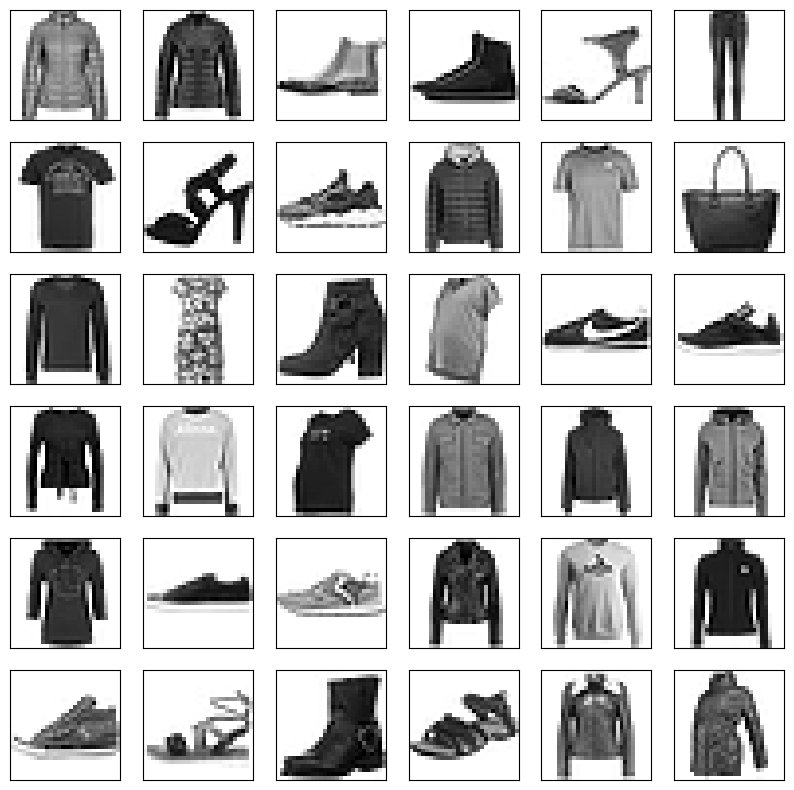

In [10]:
plt.figure(figsize= (10,10))
i = 0
for (image, label) in test_dataset.take(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    i += 1
plt.show()


In [11]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(60000).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28,1)),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
hist = model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(60000/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4895 - accuracy: 0.8281
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3715 - accuracy: 0.8672
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3320 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3046 - accuracy: 0.8888
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2933 - accuracy: 0.8918
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2763 - accuracy: 0.8988
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2629 - accuracy: 0.9026
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2556 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2486 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.239

In [15]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(10000/BATCH_SIZE))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3388 - accuracy: 0.8836
Accuracy on test dataset: 0.8835999965667725


In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [19]:
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

313/313 [==============================] - 1s 2ms/step


(<Figure size 800x800 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

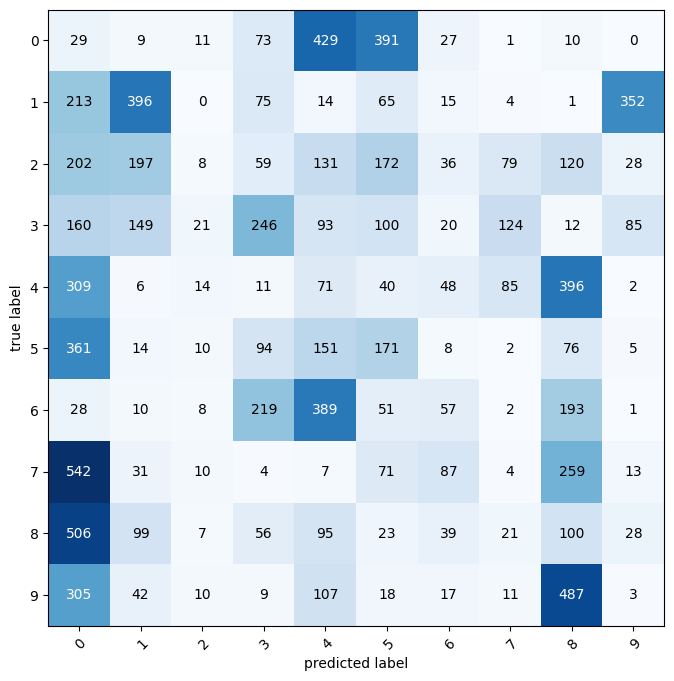

In [20]:
validation_batches = test_dataset.batch(BATCH_SIZE)

pred = model.predict(validation_batches)
pred = np.argmax(pred,axis=1)
true = tf.concat([y for x,y in validation_batches],axis=0)
mat = confusion_matrix(true,pred)
plot_confusion_matrix(conf_mat=mat,figsize=(8,8), class_names=metadata.features['label'].names)

In [21]:
pred

array([5, 3, 0, ..., 4, 5, 0], dtype=int64)